# Tensorflow/Keras version of CNN

#### Import required packages

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist

#### Load training and testing data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Prepare data

In [3]:
# Change the shape of the tensor
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize values
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# One hot encode Y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



### Build model

In [12]:
# build model with Keras's Sequential API
model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # first layer is a 2D conv layer with a 3x3 kernel
                    MaxPooling2D((2,2)), # downsampling layer
                    Dropout(0.2), # dropout layer
                    Conv2D(32, (3,3), activation='relu', input_shape=(14,14,1)),
                    Flatten(), # flatten the tensor
                    Dropout(0.2), # dropout layer
                    Dense(100, activation='relu'), # Dense layer with 100 nodes
                    Dense(10, activation="softmax") # final layer 10 nodes - for each possible number
                    ])

#### Select optimizer and compile model

In [13]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#### Train model

In [14]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1400 - accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0354 - accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0271 - accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0116 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

#### Show test image

1/1 [==============================] - 0s 44ms/step


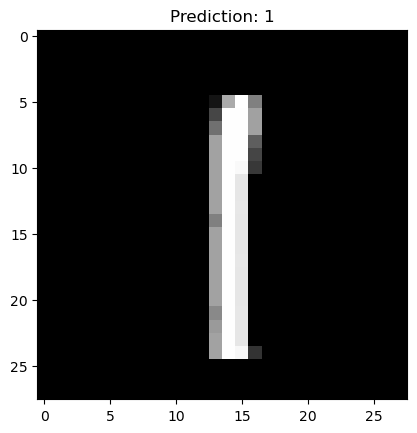

In [ ]:
# pick random image from test set
img = random.choice(X_test)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title(f"Prediction: {np.argmax(model.predict((img.reshape((1, 28, 28, 1)).astype('float32'))/255)[0], axis=-1)}")
plt.show()

In [15]:
model.test_on_batch(X_test, y_test)

[0.033170610666275024, 0.9908999800682068]

> Based on the test set accuracy the model has overfitted the training data slightly

In [ ]:
model.save("mnist_cnn.h5")